In [5]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *
import json
try:
    import datapackage
except:
    os.system('pip install --upgrade datapackage')
    import datapackage

package = datapackage.Package('https://datahub.io/core/geo-countries/datapackage.json')
for resource in package.resources:
    if resource.name == 'countries':
        js = json.loads(resource.raw_read())
        break
L = [{'country' :g['properties']['ADMIN'],
      'abbr'    :g['properties']['ISO_A3'],
      'geometry':str(g['geometry'])
     } for g in js['features']]
df = pd.DataFrame(L)
tbl = f'{data_bq}.countries'
tbl_raw = tbl + '_raw'
load_table(tbl_raw, df=df)
# load_table(tbl_raw, df=df.to_wkb())
query = f"""
select
    country,
    abbr,
    st_geogfromgeojson(geometry, make_valid => TRUE) as polygon
from
    {tbl_raw}
order by
    country
"""
load_table(tbl, query=query)
delete_table(tbl_raw)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/jupyter/MathVGerrmandering_CMAT_2021


In [7]:
js['features'][:14]

[{'type': 'Feature',
  'properties': {'ADMIN': 'Aruba', 'ISO_A3': 'ABW'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-69.99693762899992, 12.577582098000036],
     [-69.93639075399994, 12.53172435100005],
     [-69.92467200399994, 12.519232489000046],
     [-69.91576087099992, 12.497015692000076],
     [-69.88019771999984, 12.453558661000045],
     [-69.87682044199994, 12.427394924000097],
     [-69.88809160099993, 12.417669989000046],
     [-69.90880286399994, 12.417792059000107],
     [-69.93053137899989, 12.425970770000035],
     [-69.94513912699992, 12.44037506700009],
     [-69.92467200399994, 12.44037506700009],
     [-69.92467200399994, 12.447211005000014],
     [-69.95856686099992, 12.463202216000099],
     [-70.02765865799992, 12.522935289000088],
     [-70.04808508999989, 12.53115469000008],
     [-70.05809485599988, 12.537176825000088],
     [-70.06240800699987, 12.546820380000057],
     [-70.06037350199995, 12.556952216000113],
     [-70.0510961579999, 12.5740420

In [6]:
df.tail(14)

,country,abbr,geometry
241,Vatican,VAT,"{'type': 'Polygon', 'coordinates': [[[12.45313..."
242,Saint Vincent and the Grenadines,VCT,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
243,Venezuela,VEN,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
244,British Virgin Islands,VGB,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
245,United States Virgin Islands,VIR,"{'type': 'MultiPolygon', 'coordinates': [[[[-6..."
246,Vietnam,VNM,"{'type': 'MultiPolygon', 'coordinates': [[[[10..."
247,Vanuatu,VUT,"{'type': 'MultiPolygon', 'coordinates': [[[[16..."
248,Wallis and Futuna,WLF,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
249,Akrotiri Sovereign Base Area,-99,"{'type': 'Polygon', 'coordinates': [[[32.84080..."
250,Samoa,WSM,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."


In [15]:
pd.DataFrame.from_dict?

Signature:
pd.DataFrame.from_dict(
    data,
    orient: 'str' = 'columns',
    dtype: 'Dtype | None' = None,
    columns=None,
) -> 'DataFrame'
Docstring:
Construct DataFrame from dict of array-like or dicts.

Creates DataFrame object from dictionary by columns or by index
allowing dtype specification.

Parameters
----------
data : dict
    Of the form {field : array-like} or {field : dict}.
orient : {'columns', 'index'}, default 'columns'
    The "orientation" of the data. If the keys of the passed dict
    should be the columns of the resulting DataFrame, pass 'columns'
    (default). Otherwise if the keys should be rows, pass 'index'.
dtype : dtype, default None
    Data type to force, otherwise infer.
columns : list, default None
    Column labels to use when ``orient='index'``. Raises a ValueError
    if used with ``orient='columns'``.

Returns
-------
DataFrame

See Also
--------
DataFrame.from_records : DataFrame from structured ndarray, sequence
    of tuples or dicts, or Data

In [ ]:
query = f"""
select
    ST_GEOGFROMGEOJSON("{js['geometry']}")
"""
load_table(tbl, query=query)

In [13]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *
import shapely.ops
try:
    import datapackage
except:
    os.system('pip install --upgrade datapackage')
    import datapackage
package = datapackage.Package('https://datahub.io/core/geo-countries/datapackage.json')
for resource in package.resources:
    if resource.name == 'countries':
        df = gpd.read_file(resource.descriptor['path']).to_crs(crs_census)#.to_crs(crs_area)
df.columns = ['country', 'abbr', 'geometry']
mask = ~df['country'].isin(['Antarctica'])
df.loc[mask,'geometry'] = df.loc[mask,'geometry'].buffer(0.0001)
df['geometry'] = df['geometry'].to_crs(crs_census)#.apply(lambda p: shapely.ops.orient(p, -1))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/jupyter/MathVGerrmandering_CMAT_2021


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [15]:
js = { "type": "Feature", "properties": { "ADMIN": "Aruba", "ISO_A3": "ABW" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -69.996937628999916, 12.577582098000036 ], [ -69.936390753999945, 12.531724351000051 ], [ -69.924672003999945, 12.519232489000046 ], [ -69.915760870999918, 12.497015692000076 ], [ -69.880197719999842, 12.453558661000045 ], [ -69.876820441999939, 12.427394924000097 ], [ -69.888091600999928, 12.417669989000046 ], [ -69.908802863999938, 12.417792059000107 ], [ -69.930531378999888, 12.425970770000035 ], [ -69.945139126999919, 12.44037506700009 ], [ -69.924672003999945, 12.44037506700009 ], [ -69.924672003999945, 12.447211005000014 ], [ -69.958566860999923, 12.463202216000099 ], [ -70.027658657999922, 12.522935289000088 ], [ -70.048085089999887, 12.531154690000079 ], [ -70.058094855999883, 12.537176825000088 ], [ -70.062408006999874, 12.546820380000057 ], [ -70.060373501999948, 12.556952216000113 ], [ -70.051096157999893, 12.574042059000064 ], [ -70.048736131999931, 12.583726304000024 ], [ -70.052642381999931, 12.600002346000053 ], [ -70.059641079999921, 12.614243882000054 ], [ -70.061105923999975, 12.625392971000068 ], [ -70.048736131999931, 12.632147528000104 ], [ -70.00715084499987, 12.5855166690001 ], [ -69.996937628999916, 12.577582098000036 ] ] ] } }
js

{'type': 'Feature',
 'properties': {'ADMIN': 'Aruba', 'ISO_A3': 'ABW'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-69.99693762899992, 12.577582098000036],
    [-69.93639075399994, 12.53172435100005],
    [-69.92467200399994, 12.519232489000046],
    [-69.91576087099992, 12.497015692000076],
    [-69.88019771999984, 12.453558661000045],
    [-69.87682044199994, 12.427394924000097],
    [-69.88809160099993, 12.417669989000046],
    [-69.90880286399994, 12.417792059000107],
    [-69.93053137899989, 12.425970770000035],
    [-69.94513912699992, 12.44037506700009],
    [-69.92467200399994, 12.44037506700009],
    [-69.92467200399994, 12.447211005000014],
    [-69.95856686099992, 12.463202216000099],
    [-70.02765865799992, 12.522935289000088],
    [-70.04808508999989, 12.53115469000008],
    [-70.05809485599988, 12.537176825000088],
    [-70.06240800699987, 12.546820380000057],
    [-70.06037350199995, 12.556952216000113],
    [-70.0510961579999, 12.574042059000064],
    [-70.04

In [18]:
query = f"""
select
    ST_GEOGFROMGEOJSON("{js['geometry']}")
"""
load_table(tbl, query=query)

'cmat-315920.redistricting_data.countries'

In [ ]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *
import shapely.ops
try:
    import datapackage
except:
    os.system('pip install --upgrade datapackage')
    import datapackage
package = datapackage.Package('https://datahub.io/core/geo-countries/datapackage.json')
for resource in package.resources:
    if resource.name == 'countries':
        
        df = gpd.read_file(resource.descriptor['path']).to_crs(crs_census)#.to_crs(crs_area)
df.columns = ['country', 'abbr', 'geometry']
mask = ~df['country'].isin(['Antarctica'])
df.loc[mask,'geometry'] = df.loc[mask,'geometry'].buffer(0.0001)
df['geometry'] = df['geometry'].to_crs(crs_census)#.apply(lambda p: shapely.ops.orient(p, -1))

In [14]:
tbl = f'{data_bq}.countries'
tbl_raw = tbl + '_raw'
# df = df.query('country not in ["Antarctica"]')
# load_table(tbl_raw, df=df.query('country not in ["Antarctica"]').to_wkb())
load_table(tbl_raw, df=df.to_wkb())
query = f"""
select
    country,
    abbr,
    st_geogfrom(geometry) as polygon
from
    {tbl_raw}
order by
    country
"""
load_table(tbl, query=query)

BadRequest: 400 GET https://bigquery.googleapis.com/bigquery/v2/projects/cmat-315920/queries/284f7197-b638-4853-990d-b2987f82dd04?maxResults=0&location=US&prettyPrint=false: ST_GeogFrom failed: Invalid polygon loop: Edge 11329 crosses edge 12051; in polygon 163; in WKB geography

(job ID: 284f7197-b638-4853-990d-b2987f82dd04)

           -----Query Job SQL Follows-----           

    |    .    |    .    |    .    |    .    |
   1:
   2:select
   3:    country,
   4:    abbr,
   5:    st_geogfrom(geometry) as polygon
   6:from
   7:    cmat-315920.redistricting_data.countries_raw
   8:order by
   9:    country
    |    .    |    .    |    .    |    .    |

In [40]:
import pandas as pd, geopandas as gpd
w = resources[2]
gdf = gpd.read_file(resources[2].descriptor['path'])#.set_index('ADMIN')

<AxesSubplot:>

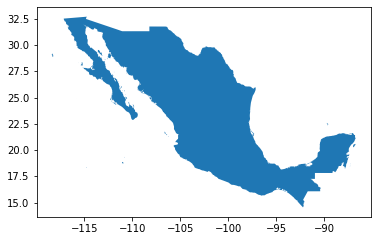

In [46]:
gdf['ADMIN'] == 'Mexico'
gdf.query("ADMIN == 'Mexico'").plot()

In [39]:
gdf.iloc[0]
gdf[gdf.index[0]]



KeyError: 'Aruba'

In [ ]:
for resource in resources:
    print(resource)


In [9]:
package.

In [4]:
pip install --upgrade datapackage

     |████████████████████████████████| 85 kB 2.7 MB/s eta 0:00:011     |███████▋                        | 20 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 6.6 MB/s  eta 0:00:01
     |████████████████████████████████| 72 kB 558 kB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 242 kB 51.4 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 5.5 MB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 52.5 MB/s eta 0:00:01
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7399 sha256=8eb22931e80c373a5ac62028cb899147ea5aa7a277a7f48e1c86f8c6317e4ac1
  Stored in directory: /root/.cache/pip/wheels/dd/0a/62/49ee84fab92057fb3e303fb1a59e75ccac6899b417f441305a
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10765 sha256=6f665a5bd2dd24e16313ff41218723d16be8d40bb244a42d8a84a6f209d27a1d
  Stored in directory: /root/.cac